In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import folium
from geopy.geocoders import Nominatim
import pandas as pd
from IPython.display import display, IFrame
import datetime
from scipy import stats

In [11]:
patients_df = pd.read_csv("../data/patients.csv")

In [12]:
patients_df.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
0,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,2017-08-24,NaN,999-68-6630,NaN,NaN,NaN,Jacinto644,Kris249,NaN,...,Beverly Massachusetts US,888 Hickle Ferry Suite 38,Springfield,Massachusetts,Hampden County,1106.0,42.151961,-72.598959,8446.49,1499.08
1,067318a4-db8f-447f-8b6e-f2f61e9baaa5,2016-08-01,NaN,999-15-5895,NaN,NaN,NaN,Alva958,Krajcik437,NaN,...,Boston Massachusetts US,1048 Skiles Trailer,Walpole,Massachusetts,Norfolk County,2081.0,42.177370,-71.281353,89893.40,1845.72
2,ae9efba3-ddc4-43f9-a781-f72019388548,1992-06-30,NaN,999-27-3385,S99971451,X53218815X,Mr.,Jayson808,Fadel536,NaN,...,Springfield Massachusetts US,1056 Harris Lane Suite 70,Chicopee,Massachusetts,Hampden County,1020.0,42.181642,-72.608842,577445.86,3528.84
3,199c586f-af16-4091-9998-ee4cfc02ee7a,2004-01-09,NaN,999-73-2461,S99956432,NaN,NaN,Jimmie93,Harris789,NaN,...,Worcester Massachusetts US,201 Mitchell Lodge Unit 67,Pembroke,Massachusetts,Plymouth County,NaN,42.075292,-70.757035,336701.72,2705.64
4,353016ea-a0ff-4154-85bb-1cf8b6cedf20,1996-11-15,NaN,999-60-7372,S99917327,X58903159X,Mr.,Gregorio366,Auer97,NaN,...,Patras Achaea GR,1050 Lindgren Extension Apt 38,Boston,Massachusetts,Suffolk County,2135.0,42.352434,-71.028610,484076.34,3043.04


In [38]:
print(f"There are {patients_df.shape[0]} rows and {patients_df.shape[1]} columns in the dataset")
print("#"*100)
print("Missing Values")
print("#"*100)
print(patients_df.isnull().sum())

There are 12352 rows and 25 columns in the dataset
####################################################################################################
Missing Values
####################################################################################################
Id                         0
BIRTHDATE                  0
DEATHDATE              10000
SSN                        0
DRIVERS                 1953
PASSPORT                2507
PREFIX                  2242
FIRST                      0
LAST                       0
SUFFIX                 12228
MAIDEN                  8812
MARITAL                 3519
RACE                       0
ETHNICITY                  0
GENDER                     0
BIRTHPLACE                 0
ADDRESS                    0
CITY                       0
STATE                      0
COUNTY                     0
ZIP                     5652
LAT                        0
LON                        0
HEALTHCARE_EXPENSES        0
HEALTHCARE_COVERAGE        0
dtype: 

In [24]:
def plot_and_display_expense_map(df):

    # Initialize a map centered at the mean
    mean_latitude = np.mean(df['LAT'])
    mean_longitude = np.mean(df['LON'])
    map_center = [mean_latitude, mean_longitude]  # Coordinates for the center of the US
    m = folium.Map(location=map_center, zoom_start=8)

    # Adding bubbles to the map
    for index, row in df.iterrows():
        if not pd.isnull(row['LAT']) and not pd.isnull(row['LON']):
            folium.CircleMarker(
                location=[row['LAT'], row['LON']],
                radius=row['HEALTHCARE_EXPENSES'] / 100000,  # Adjust size by healthcare expense
                popup=(
                    f"Address: {row['ADDRESS']}<br>"
                    f"Expense: ${row['HEALTHCARE_EXPENSES']}<br>"
                    f"Coverage: ${row['HEALTHCARE_COVERAGE']}"
                ),
                color="red",
                fill=True,
                fill_color="red",
                fill_opacity=0.4
            ).add_to(m)

    # Save the map as an HTML file
    map_file = "healthcare_expenses_map.html"
    m.save(map_file)

    # Display the map inside the notebook
    display(IFrame(map_file, width=800, height=600))

In [25]:
patients_df_sample = patients_df.sample(n=100, random_state=42)
plot_and_display_expense_map(patients_df_sample)

In [26]:
conditions_df = pd.read_csv("../data/conditions.csv")

In [34]:
print(f"There are {conditions_df.shape[0]} rows and {conditions_df.shape[1]} columns in the dataset")

There are 114544 rows and 6 columns in the dataset


In [27]:
conditions_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION
0,2019-02-15,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,d5ee30a9-362f-429e-a87a-ee38d999b0a5,65363002,Otitis media
1,2019-10-30,2020-01-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,8bca6d8a-ab80-4cbf-8abb-46654235f227,65363002,Otitis media
2,2020-03-01,2020-03-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,386661006,Fever (finding)
3,2020-03-01,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,840544004,Suspected COVID-19
4,2020-03-01,2020-03-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,840539006,COVID-19


In [39]:
print(f"There are {conditions_df.shape[0]} rows and {conditions_df.shape[1]} columns in the dataset")
print("#"*100)
print("Missing Values")
print("#"*100)
print(conditions_df.isnull().sum())

There are 114544 rows and 6 columns in the dataset
####################################################################################################
Missing Values
####################################################################################################
START              0
STOP           51448
PATIENT            0
ENCOUNTER          0
CODE               0
DESCRIPTION        0
dtype: int64


In [42]:
print("Number of unique patients: ", conditions_df['PATIENT'].nunique())
print("Frequency of each medical code", conditions_df['CODE'].value_counts())
print("Frequency of each condition" , conditions_df['DESCRIPTION'].value_counts())

Number of unique patients:  12165
Frequency of each medical code CODE
840544004    9106
840539006    8820
386661006    8083
49727002     6202
162864005    5002
             ... 
225444004       1
200936003       1
707577004       1
47505003        1
698423002       1
Name: count, Length: 178, dtype: int64
Frequency of each condition DESCRIPTION
Suspected COVID-19                                 9106
COVID-19                                           8820
Fever (finding)                                    8083
Cough (finding)                                    6202
Body mass index 30+ - obesity (finding)            5002
                                                   ... 
Lupus erythematosus                                   1
Diabetes from Cystic Fibrosis                         1
Female Infertility                                    1
Male Infertility                                      1
History of disarticulation at wrist (situation)       1
Name: count, Length: 180, dtype: int6

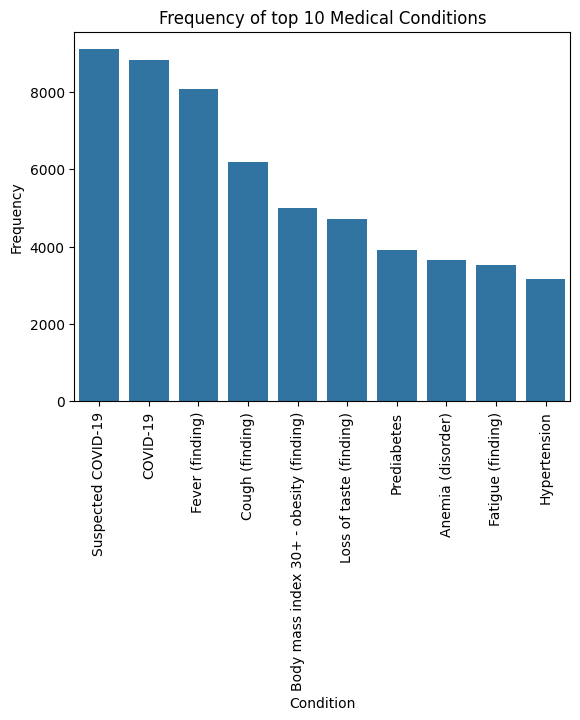

In [53]:
top_10_conditions = conditions_df['DESCRIPTION'].value_counts().head(10)
sns.barplot(x=top_10_conditions.index, y=top_10_conditions.values)
plt.xlabel('Condition')
plt.ylabel('Frequency')
plt.title('Frequency of top 10 Medical Conditions')
plt.xticks(rotation=90)
plt.show()

In [55]:
conditions_df['START'] = pd.to_datetime(conditions_df['START'])
conditions_df['STOP'] = pd.to_datetime(conditions_df['STOP'])
conditions_df['duration'] = (conditions_df['STOP'] - conditions_df['START']).dt.days
conditions_df.head()

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,duration
0,2019-02-15,2019-08-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,d5ee30a9-362f-429e-a87a-ee38d999b0a5,65363002,Otitis media,167.0
1,2019-10-30,2020-01-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,8bca6d8a-ab80-4cbf-8abb-46654235f227,65363002,Otitis media,92.0
2,2020-03-01,2020-03-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,386661006,Fever (finding),29.0
3,2020-03-01,2020-03-01,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,840544004,Suspected COVID-19,0.0
4,2020-03-01,2020-03-30,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,681c380b-3c84-4c55-80a6-db3d9ea12fee,840539006,COVID-19,29.0


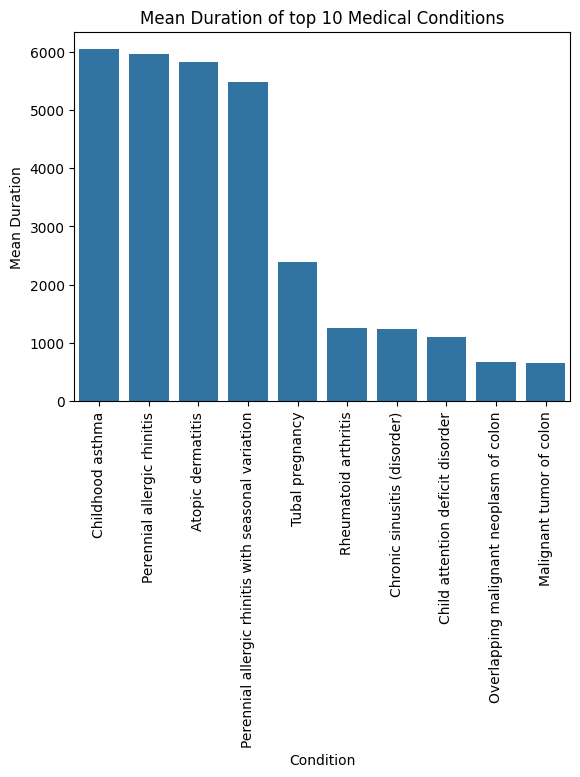

In [63]:
top_10_condition_duration = conditions_df.groupby('DESCRIPTION')['duration'].mean().reset_index().sort_values(by=['duration'], ascending=False).head(10)
sns.barplot(x=top_10_condition_duration['DESCRIPTION'], y=top_10_condition_duration['duration'])
plt.xlabel('Condition')
plt.ylabel('Mean Duration')
plt.title('Mean Duration of top 10 Medical Conditions')
plt.xticks(rotation=90)
plt.show()

In [174]:
# Filter for rows where the condition is COVID-19
covid_conditions = conditions_df[conditions_df['DESCRIPTION'] == 'COVID-19']

# Get all other conditions that co-occur with COVID-19 using the index is used to identify co-occurrences
cooccurring_conditions = conditions_df[~conditions_df.index.isin(covid_conditions.index)]
cooccurring_conditions = cooccurring_conditions[cooccurring_conditions['DESCRIPTION'] != 'COVID-19']

# Count occurrences of each co-occurring condition
condition_counts = cooccurring_conditions.groupby('PATIENT')['DESCRIPTION'].count().reset_index().sort_values(by=['DESCRIPTION'], ascending=False).head(10)
condition_counts

,PATIENT,DESCRIPTION
2985,3e5af47c-897c-4ed0-9a58-f94e25eb0366,39
909,1308e3c0-023b-4b04-b722-5dc9da055031,36
11458,f17adf50-3ed0-47f4-bb48-cd5bfa5945ac,35
1322,1b982bad-94c9-4cdf-a0c4-9a35bba866e2,33
678,0e7937e8-bbe6-458d-95fa-5a3e1a8de80b,33
10857,e5a3f36b-a64c-4532-97a6-ce222b88517c,32
5752,7a51f54b-bf90-4319-a53f-76646e791e55,31
9693,cd43cc40-feac-42ca-b80c-201ab04cc3ea,31
4105,559f49d6-2f7d-4f53-a780-879e189c76dd,31
4340,5a63e899-e02a-4092-b421-627d25cd45f8,31


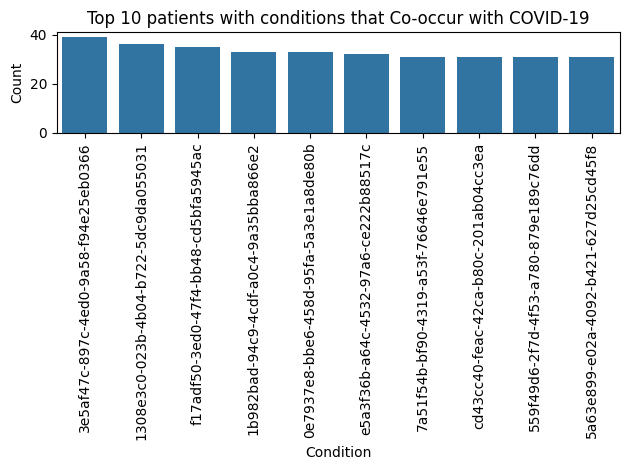

In [78]:
# Plot the results
sns.barplot(x=condition_counts['PATIENT'], y=condition_counts['DESCRIPTION'])
plt.xticks(rotation=90)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Top 10 patients with conditions that Co-occur with COVID-19')
plt.tight_layout()

# Show the plot
plt.show()

In [96]:
# Finding percentage of covid diagnosis resulting in death

covid_confirmed_code = 840539006
deceased_patients_df = patients_df[patients_df['DEATHDATE'].notnull()]
covid_death_conditions_df = conditions_df[(conditions_df['CODE']==covid_confirmed_code) & (conditions_df['PATIENT'].isin(deceased_patients_df['Id']))]
covid_conditions_df = conditions_df[conditions_df['CODE']==covid_confirmed_code]



print("total covid diagnosis", covid_conditions_df.shape[0])
print("total covid deaths", covid_death_conditions_df.shape[0])
print("total deaths", deceased_patients_df.shape[0])

death_percentage_c = (covid_death_conditions_df.shape[0]/covid_conditions_df.shape[0])
print(f"Percentage of COVID-19 diagnoses that result in death: {death_percentage_c:.2f}%")





total covid diagnosis 8820
total covid deaths 357
total deaths 2352
Percentage of COVID-19 diagnoses that result in death: 0.04%


DESCRIPTION
Hypoxemia (disorder)                              349
Pneumonia (disorder)                              349
Respiratory distress (finding)                    349
Sepsis caused by virus (disorder)                 345
Acute respiratory failure (disorder)              341
Fever (finding)                                   329
Cough (finding)                                   237
Acute respiratory distress syndrome (disorder)    226
Body mass index 30+ - obesity (finding)           204
Anemia (disorder)                                 197
Name: count, dtype: int64
DESCRIPTION
Body mass index 30+ - obesity (finding)        1026
Anemia (disorder)                               922
Prediabetes                                     895
Hypertension                                    605
Chronic congestive heart failure (disorder)     600
Chronic sinusitis (disorder)                    587
Hyperlipidemia                                  444
Miscarriage in first trimester                

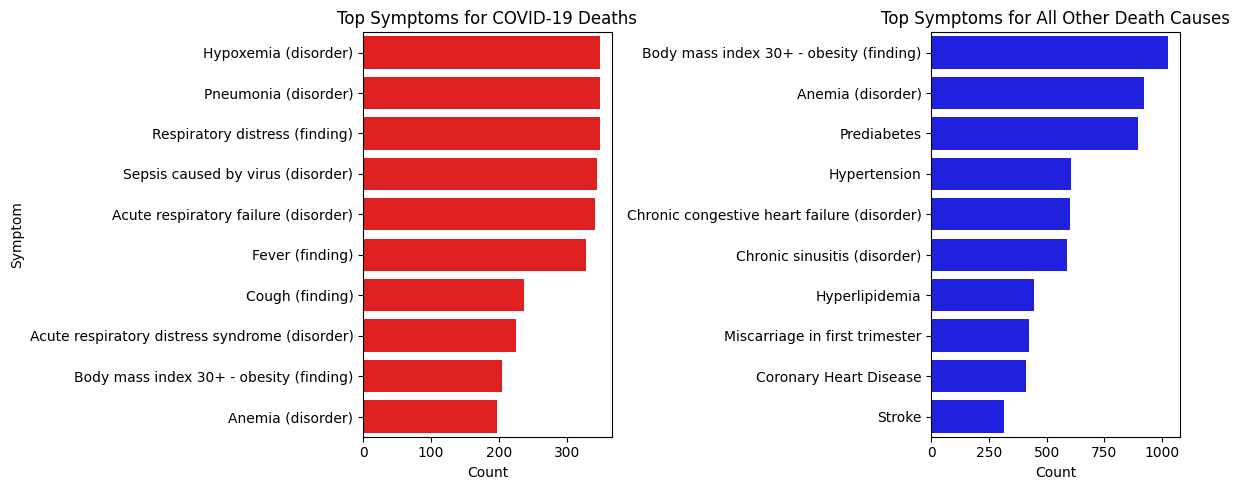

In [112]:
deceased_patients_covid_conditions_df = conditions_df[(conditions_df['PATIENT'].isin(covid_death_conditions_df['PATIENT'])) & ~conditions_df['DESCRIPTION'].isin(['COVID-19', 'Suspected COVID-19'])]
symptoms_covid_deaths_df = deceased_patients_covid_conditions_df['DESCRIPTION'].value_counts().head(10)

deceased_patients_conditions_df = conditions_df[(conditions_df['PATIENT'].isin(deceased_patients_df['Id'])) & ~conditions_df['PATIENT'].isin(covid_death_conditions_df['PATIENT'])]
symptoms_all_deaths_df = deceased_patients_conditions_df['DESCRIPTION'].value_counts().head(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for COVID-19 deaths
sns.barplot(ax=axes[0], x=symptoms_covid_deaths_df.values, y=symptoms_covid_deaths_df.index, color='red')
axes[0].set_title("Top Symptoms for COVID-19 Deaths")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Symptom")

# Plot for all other deaths
sns.barplot(ax=axes[1], x=symptoms_all_deaths_df.values, y=symptoms_all_deaths_df.index, color='blue')
axes[1].set_title("Top Symptoms for All Other Death Causes")
axes[1].set_xlabel("Count")
axes[1].set_ylabel("")

# Adjust layout
plt.tight_layout()
plt.show()

In [138]:
observation_records = []
for observation in observations_df['DESCRIPTION'].unique():
    observations_dead_patients_df['VALUE'] = pd.to_numeric(observations_dead_patients_df['VALUE'], errors='coerce')
    observations_dead = observations_dead_patients_df[observations_dead_patients_df['DESCRIPTION'] == observation]['VALUE'].dropna()
    mean_value_d = np.mean(observations_dead)
    std_d = np.std(observations_dead)
    N_d = len(observations_dead)
    
    #print(f"Mean {observation} for patients with covid deaths", mean_value_d)

    observations_other_patients_df['VALUE'] = pd.to_numeric(observations_other_patients_df['VALUE'], errors='coerce')
    observations_other = observations_other_patients_df[observations_other_patients_df['DESCRIPTION'] == observation]['VALUE'].dropna()
    mean_value_o = np.mean(observations_other)
    std_o = np.std(observations_other)
    N_o = len(observations_other) 
    #print(f"Mean {observation} for other patients", mean_value_o)
    
    observation_records.append({'observation' : observation, 'mean_value_dead' : mean_value_d, 'std_dead' : std_d, 'count_dead' : N_d, 'mean_value_other' : mean_value_o, 'std_other' : std_o, 'count_other' : N_o})
    
obs_comp_df = pd.DataFrame(observation_records)
obs_comp_df.head()

obs_comp_df = obs_comp_df.dropna()


C:\Users\Sarit Adhikari\AppData\Local\Temp\ipykernel_1076\4071743372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations_dead_patients_df['VALUE'] = pd.to_numeric(observations_dead_patients_df['VALUE'], errors='coerce')
C:\Users\Sarit Adhikari\AppData\Local\Temp\ipykernel_1076\4071743372.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  observations_other_patients_df['VALUE'] = pd.to_numeric(observations_other_patients_df['VALUE'], errors='coerce')


In [139]:
t_test_results = []
# Perform t-test for each observation
for index, row in obs_comp_df.iterrows():
    
    mean_dead = row['mean_value_dead']
    count_dead = row['count_dead']
    std_dead = row['std_dead']
    
    mean_other = row['mean_value_other']
    count_other = row['count_other']
    std_other = row['std_other']
    
    # Perform independent t-test (Welch's t-test does not assume equal variances)
    t_stat, p_value = stats.ttest_ind_from_stats(
        mean1=mean_dead, std1=std_dead, nobs1=count_dead,
        mean2=mean_other, std2=std_other, nobs2=count_other,
        equal_var=False
    )
    
    t_test_results.append({
        'observation': row['observation'],
        'mean_value_dead': mean_dead,
        'mean_value_other': mean_other,
        't_stat': t_stat,
        'p_value': p_value,
        'significant' : p_value<0.05
    })
    
obs_comp_t_test_df = pd.DataFrame(t_test_results)
obs_comp_t_test_df


,observation,mean_value_dead,mean_value_other,t_stat,p_value,significant
0,Body Height,171.282192,156.482119,30.382821,1.922235e-151,True
1,Pain severity - 0-10 verbal numeric rating [Sc...,2.966241,2.742191,4.280512,2.006740e-05,True
2,Body Weight,83.937340,74.124443,49.198348,0.000000e+00,True
3,Diastolic Blood Pressure,80.714047,80.546834,1.452537,1.464010e-01,False
4,Systolic Blood Pressure,122.032372,121.607199,1.927192,5.399920e-02,False
...,...,...,...,...,...,...
96,DXA [T-score] Bone density,-1.066667,-0.926357,-0.195082,8.525464e-01,False
97,Polyp size greatest dimension by CAP cancer pr...,5.500000,5.693333,-0.148663,8.862958e-01,False
98,Hemoglobin.gastrointestinal [Presence] in Stoo...,71.950000,40.930667,0.579907,5.848313e-01,False
99,Weight difference [Mass difference] --pre dial...,3.023729,3.016580,0.122189,9.027913e-01,False


In [249]:
medications_df = pd.read_csv("../data/medications.csv")
medications_df.head()

,START,STOP,PATIENT,PAYER,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,PAYER_COVERAGE,DISPENSES,TOTALCOST,REASONCODE,REASONDESCRIPTION
0,2019-10-30,2019-11-13,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,8bca6d8a-ab80-4cbf-8abb-46654235f227,308182,Amoxicillin 250 MG Oral Capsule,7.05,0.0,1,7.05,NaN,NaN
1,2019-10-30,2019-11-13,f0f3bc8d-ef38-49ce-a2bd-dfdda982b271,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,8bca6d8a-ab80-4cbf-8abb-46654235f227,313820,Acetaminophen 160 MG Chewable Tablet,5.72,0.0,1,5.72,NaN,NaN
2,2020-02-12,2020-02-26,067318a4-db8f-447f-8b6e-f2f61e9baaa5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,adedca64-700b-4fb9-82f1-9cbb658abb73,313820,Acetaminophen 160 MG Chewable Tablet,5.25,0.0,1,5.25,NaN,NaN
3,2020-04-28,2020-05-08,067318a4-db8f-447f-8b6e-f2f61e9baaa5,5059a55e-5d6e-34d1-b6cb-d83d16e57bcf,e03b96de-5604-4989-a2d5-03a63e041eab,834061,Penicillin V Potassium 250 MG Oral Tablet,13.90,0.0,1,13.90,43878008.0,Streptococcal sore throat (disorder)
4,2010-11-22,2011-08-30,ae9efba3-ddc4-43f9-a781-f72019388548,d47b3510-2895-3b70-9897-342d681c769d,11a2dfae-53d4-4d13-a74b-c540a525a1c4,999967,amLODIPine 5 MG / Hydrochlorothiazide 12.5 MG ...,263.49,0.0,9,2371.41,59621000.0,Hypertension


In [233]:
medications_count = medications_df['DESCRIPTION'].nunique()
print(f"There are {medications_count} different medications used")
top_20_medicines = medications_df['DESCRIPTION'].value_counts().head(20)

other_medicines = medications_df[~medications_df['DESCRIPTION'].isin(top_20_medicines.index)]
new_value = pd.Series(len(other_medicines), index=['OTHER'])
freq_medicines = pd.concat([top_20_medicines, new_value])

There are 176 different medications used


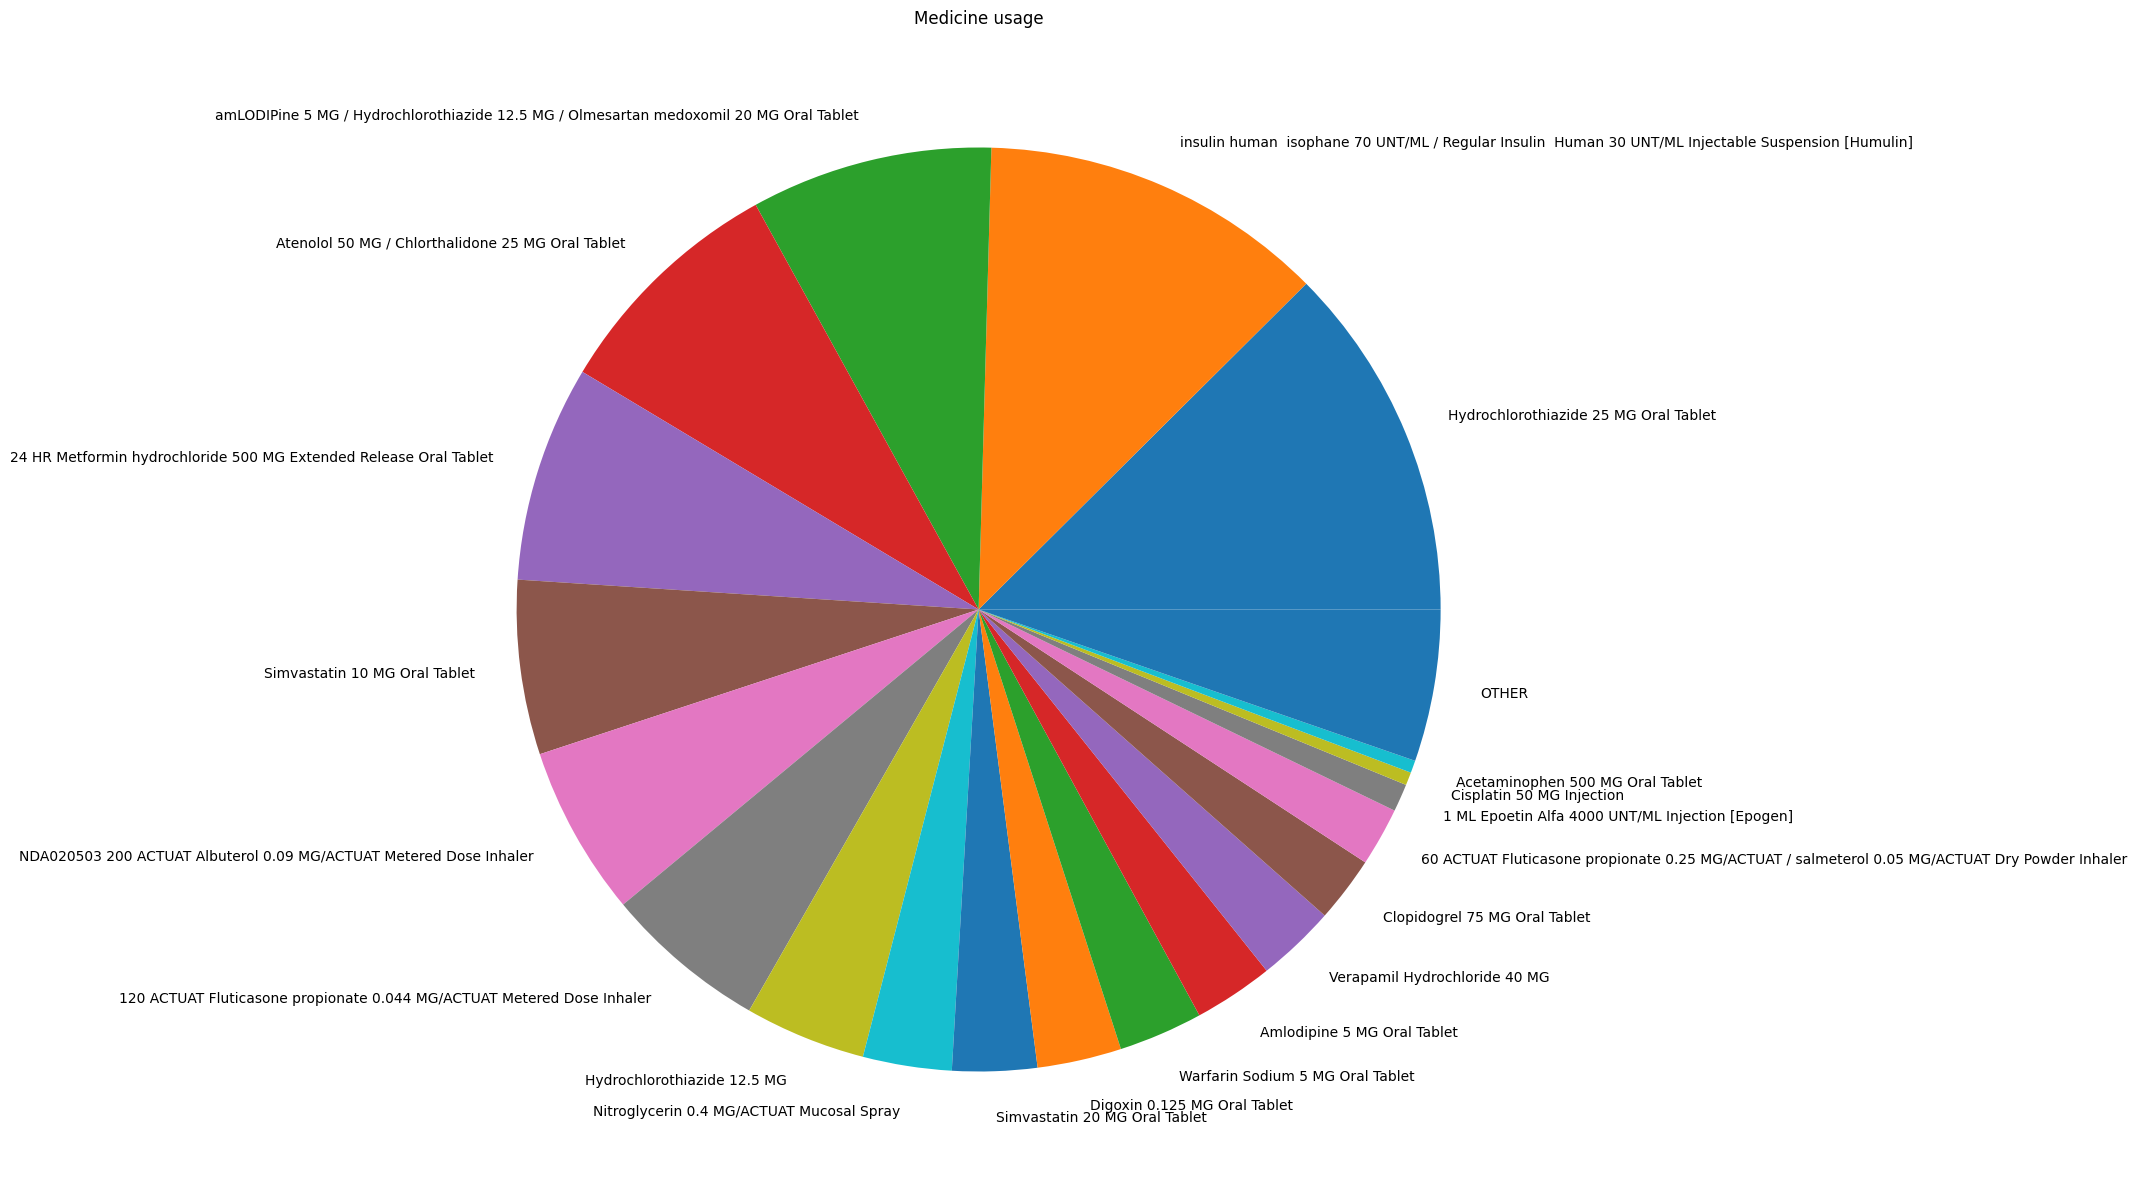

In [234]:
freq_medicines.plot.pie(y='count', figsize=(20, 15))
plt.title('Medicine usage')
plt.show()

In [235]:
print(f"Average base cost of medicine {medications_df['BASE_COST'].mean()}")
print(f"Average total cost of medicine {medications_df['TOTALCOST'].mean()}")
print(f"Average coverage for medicine {medications_df['PAYER_COVERAGE'].mean()}")

Average base cost of medicine 262.2270914432526
Average total cost of medicine 2626.2813087172067
Average coverage for medicine 93.87058783291828


In [251]:
covid_19_medications_df = medications_df[medications_df['REASONDESCRIPTION']=='COVID-19']
covid_19_medications_df.DESCRIPTION.unique()

array(['Leronlimab 700 MG Injection', 'Aviptadil Infusion',
       'remdesivir 100 MG Injection', 'baricitinib 2 MG Oral Tablet',
       'Azithromycin 250 MG Oral Tablet',
       'chloroquine phosphate 500 MG Oral Tablet',
       'Hydroxychloroquine Sulfate 200 MG Oral Tablet',
       '20 ML tocilizumab 20 MG/ML Injection', 'CD24Fc 480 MG IV',
       'CM4620 Injectable Emulsion', 'Lenzilumab 200 MG IV',
       '0.67 ML anakinra 149 MG/ML Prefilled Syringe'], dtype=object)

In [237]:
patients_covid_19_medication = covid_19_medications_df['PATIENT'].unique()

covid_conditions_med = covid_conditions[(conditions_df['PATIENT'].isin(patients_covid_19_medication))]
print("Total number of patients with medication: ", covid_conditions_med['PATIENT'].nunique())
print("Total number of patients with covid condition", covid_conditions['PATIENT'].nunique())


Total number of patients with medication:  124
Total number of patients with covid condition 8820


C:\Users\Sarit Adhikari\AppData\Local\Temp\ipykernel_1076\3662475112.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  covid_conditions_med = covid_conditions[(conditions_df['PATIENT'].isin(patients_covid_19_medication))]


In [238]:
covid_19_patients = conditions_df[(conditions_df['DESCRIPTION']=='COVID-19')]['PATIENT'].unique()
covid_19_dead_patients = covid_death_conditions_df['PATIENT'].unique()

In [245]:
print(covid_19_medications_df['STOP'].apply(type).unique())

[<class 'pandas._libs.tslibs.nattype.NaTType'>]


<Axes: xlabel='DESCRIPTION'>

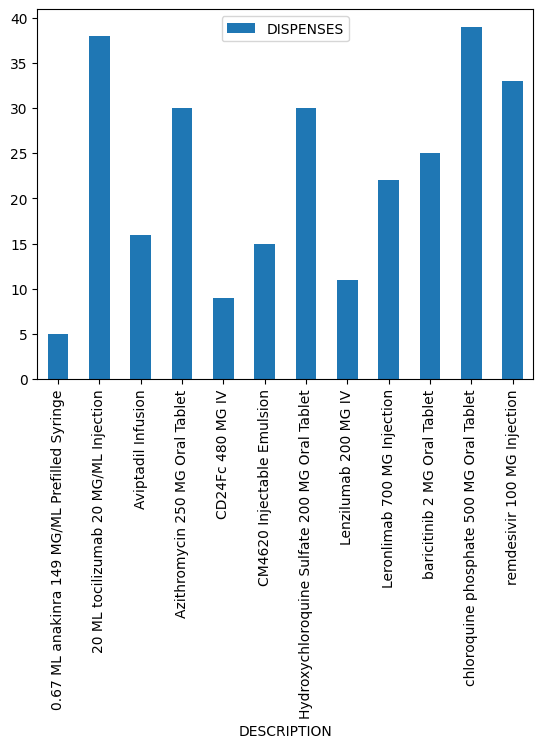

In [268]:
medicine_dispenses = covid_19_medications_df.groupby('DESCRIPTION')['DISPENSES'].sum().reset_index()
medicine_dispenses.plot.bar(x='DESCRIPTION', y='DISPENSES')